# Project Oxford: Face API example

### This Jupyter notebook shows you how to get started with the Project Oxford <b>Face API</b> in Python, and how to visualize your results.

To use this notebook, you will need to get keys to <b>Face API</b>. Visit <a href="http://www.projectoxford.ai/face">www.projectoxford.ai/face</a>, and then the “Try for free” button. On the “Sign in” page, use your Microsoft account to sign in and you will be able to subscribe to Face API and get free keys (Code of Conduct and TOS). After completing the sign-up process, paste your key into the variables section below. (Either the primary or the secondary key works.)

In [1]:
import time 
import requests
import cv2
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [2]:
# Variables

_url = 'https://api.projectoxford.ai/face/v1.0/detect'
_key = None #Here you have to paste your primary key
_maxNumRetries = 10

## Detect faces from an image retrieved via URL

In [3]:
# URL direction to image
urlImage = 'https://raw.githubusercontent.com/Microsoft/ProjectOxford-ClientSDK/master/Face/Windows/Data/identification1.jpg'

# Face detection parameters
params = { 'returnFaceAttributes': 'age,gender', 
           'returnFaceLandmarks': 'true'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 

retries = 0
result = None

while True:
 
    response = requests.request( 'post', _url, json = json, data = None, headers = headers, params = params )

    if response.status_code == 429:
        
        print "Message: %s" % ( response.json()['error']['message'] )
        
        if retries <= _maxNumRetries: 
            time.sleep(1) 
            retries += 1
            continue
        else: 
            print 'Error: failed after retrying!'
            break

    elif response.status_code == 200 or response.status_code == 201:

        if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
            result = None 
        elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
            if 'application/json' in response.headers['content-type'].lower(): 
                result = response.json() if response.content else None 
            elif 'image' in response.headers['content-type'].lower(): 
                result = response.content
    else:
        print "Error code: %d" % ( response.status_code )
        print "Message: %s" % ( response.json()['error']['message'] )
        
    break

Let's show first the original image

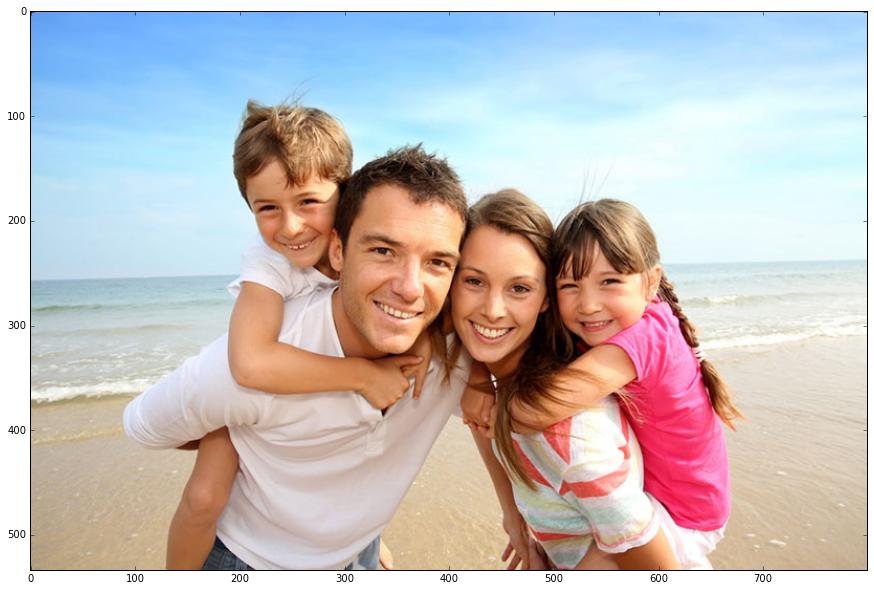

In [4]:
arr = np.asarray( bytearray( requests.get(urlImage).content ), dtype=np.uint8 )
img = cv2.cvtColor( cv2.imdecode(arr,-1), cv2.COLOR_BGR2RGB)
ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(img)

And now, we can show the original image with the detection results overlaid

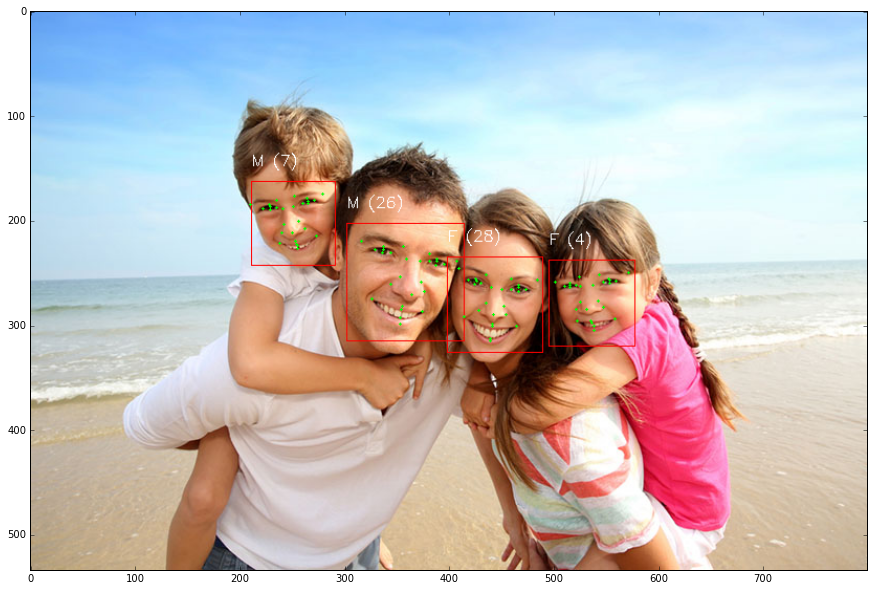

In [5]:
for currFace in result:
    faceRectangle = currFace['faceRectangle']
    cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                       (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                   color = (255,0,0), thickness = 1 )
    
    faceLandmarks = currFace['faceLandmarks']
    
    for _, currLandmark in faceLandmarks.iteritems():
        cv2.circle( img, (int(currLandmark['x']),int(currLandmark['y'])), color = (0,255,0), thickness= -1, radius = 1 )

for currFace in result:
    faceRectangle = currFace['faceRectangle']
    faceAttributes = currFace['faceAttributes']
    
    textToWrite = "%c (%d)" % ( 'M' if faceAttributes['gender']=='male' else 'F', faceAttributes['age'] )
    cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1 )
    
ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(img)